Importing Libraries

In [16]:
import numpy as np
import pandas as pd
import os
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow import keras
from tensorflow.keras import Input
from keras.preprocessing.image import ImageDataGenerator, load_img
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

Mounting google drive and mentioning the path of images uploaded in the drive

In [17]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Path of train and test images in the drive

In [18]:
trainpath = '/content/drive/MyDrive/chest_xray/train'
testpath = '/content/drive/MyDrive/chest_xray/test'


Defining training data 

In [20]:
trainset=[]
mapping={"PNEUMONIA":0,"NORMAL":1}
count=0

for file in os.listdir(trainpath):
    path=os.path.join(trainpath,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='grayscale', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        trainset.append([image,count])     
    count=count+1

Defining test data

In [22]:
testset=[]
mapping={"PNEUMONIA":0,"NORMAL":1}
count=0

for file in os.listdir(testpath):
    path=os.path.join(testpath,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='grayscale', target_size=(150,150))
        image=img_to_array(image)
        image=image/255.0
        testset.append([image,count])         
    count=count+1

Total count of train , test and validation images available for the model

In [23]:
data,labels0=zip(*trainset)
test,testlabels0=zip(*testset)


In [25]:
print('Total number of images in training dataset :',len(data))
print('Number of images of NORMAL:',sum(labels0))
print('Number of images of PNEUMONIA :',len(data)-sum(labels0))

Total number of images in training dataset : 5216
Number of images of NORMAL: 1341
Number of images of PNEUMONIA : 3875


In [26]:
print('Total number of images in testing dataset :',len(test))
print('Number of images of NORMAL:',sum(testlabels0))
print('Number of images of PNEUMONIA :',len(test)-sum(testlabels0))

Total number of images in testing dataset : 624
Number of images of NORMAL: 234
Number of images of PNEUMONIA : 390


Preview of data used for training the model

Text(0.5, 1.0, 'PNEUMONIA - person610_bacteria_2475.jpeg')

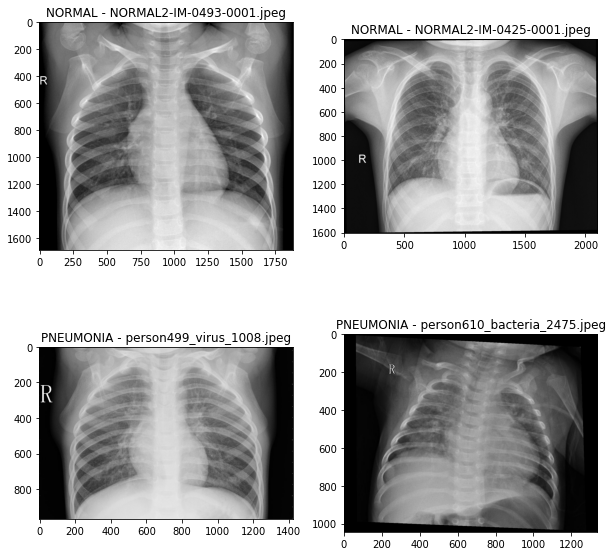

In [27]:
#Preview of train images 

trainnormal = "/content/drive/MyDrive/chest_xray/train/NORMAL"
dir_list1 = os.listdir(trainnormal) 
random_image1 = random.choice(dir_list1)
img_normal = load_img(trainpath + '/NORMAL/' + random_image1)
random_image2 = random.choice(dir_list1)
img_normal1 = load_img(trainpath + '/NORMAL/' + random_image2)

trainpnuemonia = "/content/drive/MyDrive/chest_xray/train/PNEUMONIA"
dir_list2 = os.listdir(trainpnuemonia) 
random_image3 = random.choice(dir_list2)
img_pneumonia = load_img(trainpath + '/PNEUMONIA/' + random_image3)
random_image4 = random.choice(dir_list2)
img_pneumonia1 = load_img(trainpath + '/PNEUMONIA/' + random_image4)


fig, axs = plt.subplots(2,2,figsize=(10,10))
axs[0][0].imshow(img_normal)
axs[0][0].set_title("NORMAL - " + random_image1)
axs[0][1].imshow(img_normal1)
axs[0][1].set_title("NORMAL - " + random_image2)
axs[1][0].imshow(img_pneumonia)
axs[1][0].set_title("PNEUMONIA - " + random_image3)
axs[1][1].imshow(img_pneumonia1)
axs[1][1].set_title("PNEUMONIA - " + random_image4)

Defining train and test dataset and applying train test split

In [28]:
labels1=to_categorical(labels0)
X_train=np.array(data)
y_train=np.array(labels1)
print("Data Shape:{}\nTrain Labels shape: {}".format(X_train.shape,y_train.shape))

testlabels1=to_categorical(testlabels0)
X_test=np.array(test)
y_test=np.array(testlabels1)
print("Test Shape:{}\nTest Labels shape: {}".format(X_test.shape,y_test.shape))

Data Shape:(5216, 150, 150, 1)
Train Labels shape: (5216, 2)
Test Shape:(624, 150, 150, 1)
Test Labels shape: (624, 2)


In [29]:
trainx,k,trainy,k1=train_test_split(X_train,y_train,test_size=0.0001,random_state=44)
testx,k2,testy,k3=train_test_split(X_test,y_test,test_size=0.001,random_state=44)
trainx.resize(5215,22500)
testx.resize(623,22500)
trainx.shape

(5215, 22500)

MLP Classifier model

In [36]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(100,), activation='relu', solver='adam', 
                                  batch_size= 128, learning_rate='adaptive', max_iter=100, random_state=1, 
                                  verbose=True).fit(trainx,trainy)
model.score(testx, testy)

Iteration 1, loss = 3.03455128
Iteration 2, loss = 0.45632432
Iteration 3, loss = 0.34803798
Iteration 4, loss = 0.31810215
Iteration 5, loss = 0.31049006
Iteration 6, loss = 0.27136110
Iteration 7, loss = 0.24408440
Iteration 8, loss = 0.27519742
Iteration 9, loss = 0.24453251
Iteration 10, loss = 0.22305890
Iteration 11, loss = 0.22849003
Iteration 12, loss = 0.22824954
Iteration 13, loss = 0.21336955
Iteration 14, loss = 0.21535231
Iteration 15, loss = 0.22840308
Iteration 16, loss = 0.23734398
Iteration 17, loss = 0.18830806
Iteration 18, loss = 0.21722723
Iteration 19, loss = 0.18725912
Iteration 20, loss = 0.27431877
Iteration 21, loss = 0.20028146
Iteration 22, loss = 0.18500381
Iteration 23, loss = 0.17292075
Iteration 24, loss = 0.16133848
Iteration 25, loss = 0.17074733
Iteration 26, loss = 0.15392787
Iteration 27, loss = 0.20221282
Iteration 28, loss = 0.17535565
Iteration 29, loss = 0.15088159
Iteration 30, loss = 0.15160324
Iteration 31, loss = 0.13994923
Iteration 32, los

0.7640449438202247

Accuracy of the model = 76.404%

Accuracy of the model : 76.40449438202246


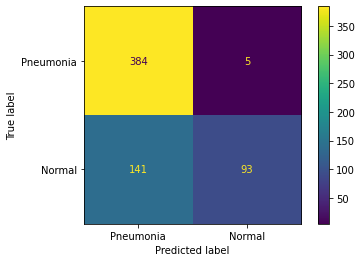

In [37]:
predy = model.predict(testx)
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(testy.argmax(axis=1),predy.argmax(axis=1))
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['Pneumonia','Normal'])
disp.plot()
print("Accuracy of the model :",100*model.score(testx,testy))

In [38]:
from sklearn.metrics import classification_report
target_names = ['Pneumonia', 'Normal']
print(classification_report(testy.argmax(axis=1),predy.argmax(axis=1), target_names=target_names))

              precision    recall  f1-score   support

   Pneumonia       0.73      0.99      0.84       389
      Normal       0.95      0.40      0.56       234

    accuracy                           0.77       623
   macro avg       0.84      0.69      0.70       623
weighted avg       0.81      0.77      0.74       623



Testing model



Normal


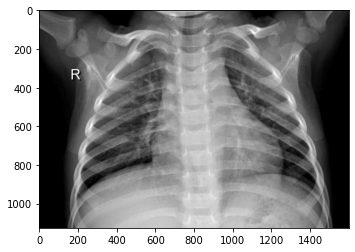

In [39]:
prediction='/content/drive/MyDrive/chest_xray/train/NORMAL/IM-0125-0001.jpeg'
image=load_img(prediction, grayscale=False, color_mode='grayscale', target_size=(150,150))
image=img_to_array(image)
image=image/255.0
x=model.predict(image.reshape(1,22500)).argmax(axis=1)[0]
if(x==0):
    print('Pneumonia')
else: 
    print('Normal')
plt.imshow(load_img(prediction))

Pneumonia


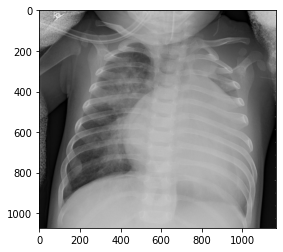

In [40]:
prediction ='/content/drive/MyDrive/chest_xray/train/PNEUMONIA/person22_bacteria_77.jpeg'
image=load_img(prediction, grayscale=False, color_mode='grayscale', target_size=(150,150))
image=img_to_array(image)
image=image/255.0
x=model.predict(image.reshape(1,22500)).argmax(axis=1)[0]
if(x==0):
    print('Pneumonia')
else: 
    print('Normal')
plt.imshow(load_img(prediction))